In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

import seaborn as sb
import matplotlib.pyplot as matplot
from pandas import plotting
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import FeatureUnion
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import DBSCAN
from sklearn import tree
from pdpbox import pdp, get_dataset, info_plots
from eli5.sklearn import PermutationImportance
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import scale
from collections import Counter
from sklearn.metrics import confusion_matrix
from pandas_profiling import ProfileReport
from xgboost import XGBClassifier
from sklearn import svm
#Data relatioship
%matplotlib inline
import warnings
import eli5
warnings.filterwarnings('ignore')
from plotly.offline import iplot, init_notebook_mode
import plotly.offline as py
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
import plotly.graph_objs as go
import datetime as dt

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Analytical Study

In [2]:
StartupFinal= pd.read_csv(r'C:\Users\erraj\OneDrive\Documents\Myfile\NEU\Quarter 5\Term 1\Capstone\StartupFile_USA_Final.csv')

In [3]:
StartupFinal.isnull().sum()

startupName                           0
homepage_url                        235
category_list                         0
total_funding                         0
status                                0
country_code                          0
state_code                            0
funding_rounds                        0
first_funding_at                      0
last_funding_at                       0
homepage_url_code                     0
time_delayFor_first_round             0
average_time_delay_rounds             0
average_raised_usd                    0
average_time_delay_rounds_number      0
time_delayFor_first_round_number      0
statusCode                            0
No_Of_Investors                       0
MainCategory                          0
USA_Region                            0
dtype: int64

In [4]:
print("The shape of final Startup dataset used for Analytical study is :", StartupFinal.shape)

The shape of final Startup dataset used for Analytical study is : (9623, 20)


In [5]:
StartupFinalForProfile=StartupFinal[['total_funding','status','state_code', 'funding_rounds', 'time_delayFor_first_round_number','average_raised_usd', 'average_time_delay_rounds_number',
              'No_Of_Investors','USA_Region','homepage_url_code', 'statusCode','MainCategory']]

In [6]:
profile= ProfileReport(StartupFinalForProfile, title='USA based ALL startups', explorative=True)

In [7]:
#profile.to_file("US-BasedALLStartups(2005-2010).html")

In [8]:
#StartupFinal= StartupFinal.fillna({
#    'average_time_between_rounds_number':StartupFinal['average_time_between_rounds_number'].mean()
#})

In [9]:
StartupFinal.head()

,startupName,homepage_url,category_list,total_funding,status,country_code,state_code,funding_rounds,first_funding_at,last_funding_at,homepage_url_code,time_delayFor_first_round,average_time_delay_rounds,average_raised_usd,average_time_delay_rounds_number,time_delayFor_first_round_number,statusCode,No_Of_Investors,MainCategory,USA_Region
0,One Inc.,http://whatis1.com,mobile,1150050.0,operating,USA,CA,3,7/20/2011,2/5/2014,1,566 days 00:00:00.000000000,465 days 12:00:00.000000000,575025.0,465,566,1,12,mobile,West
1,10-20 Media,http://www.10-20media.com,e-commerce,2050000.0,operating,USA,MD,4,6/18/2009,12/28/2011,1,285 days 00:00:00.000000000,307 days 16:00:00.000000000,512500.0,307,285,0,1,e-commerce,South
2,Redox,http://www.redoxengine.com,health care|health care information technology...,4000000.0,operating,USA,WI,2,11/26/2014,10/20/2015,1,328 days 00:00:00.000000000,328 days 00:00:00.000000000,2000000.0,328,328,1,6,healthcare,Midwest
3,10sec,https://10s.ec/,e-commerce|mobile commerce|social commerce,1600000.0,operating,USA,CA,2,10/31/2013,5/8/2014,1,189 days 00:00:00.000000000,189 days 00:00:00.000000000,1600000.0,189,189,1,2,mobile,West
4,10X Technologies,http://10xtechnologies.com,biotechnology,3550000.0,operating,USA,CA,2,11/7/2012,1/12/2015,1,796 days 00:00:00.000000000,796 days 00:00:00.000000000,1775000.0,796,796,1,1,biotech,West


In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [11]:
# encode the main category
StartupFinal['MainCatCode'] = le.fit_transform(StartupFinal['MainCategory'])

In [12]:
# unique main categories
list(le.classes_)

['biotech',
 'e-commerce',
 'games',
 'healthcare',
 'manufacturing',
 'medicalGear',
 'mobile',
 'pharma',
 'software',
 'technology']

In [13]:
# encode main regions
StartupFinal['USA_Region'] = le.fit_transform(StartupFinal['USA_Region'])

In [14]:
list(le.classes_)

['Midwest', 'Northeast', 'South', 'West']

In [15]:
# seaboarn pair plot to obtain the relationship among all varibles/features
#sb.pairplot(StartupFinal)

In [16]:
#Print the list of columns
StartupFinal.columns

Index(['startupName', 'homepage_url', 'category_list', 'total_funding',
       'status', 'country_code', 'state_code', 'funding_rounds',
       'first_funding_at', 'last_funding_at', 'homepage_url_code',
       'time_delayFor_first_round', 'average_time_delay_rounds',
       'average_raised_usd', 'average_time_delay_rounds_number',
       'time_delayFor_first_round_number', 'statusCode', 'No_Of_Investors',
       'MainCategory', 'USA_Region', 'MainCatCode'],
      dtype='object')

In [17]:
X = StartupFinal[['total_funding', 'funding_rounds', 'time_delayFor_first_round_number','average_raised_usd', 'average_time_delay_rounds_number',
              'No_Of_Investors','MainCatCode','USA_Region','homepage_url_code']]

y = StartupFinal[['statusCode']]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=40,
                                                    stratify=y)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler_transform = StandardScaler()

# Fit the scaler using the training data and scale it
X_train_scaledData = pd.DataFrame(scaler_transform.fit_transform(X_train.values),
                              columns=X.columns)

# Scale the test data
X_test_scaledData = pd.DataFrame(scaler_transform.transform(X_test.values),
                             columns=X.columns)

In [20]:
print("xtrain shape: ", X_train.shape)
print("X_train_scaledData shape: ", X_train_scaledData.shape)
print("xtest shape: ", X_test.shape)
print("X_test_scaledData shape: ", X_test_scaledData.shape)
print("ytrain shape: ", y_train.shape)
print("ytest shape: ", y_test.shape)

xtrain shape:  (7698, 9)
X_train_scaledData shape:  (7698, 9)
xtest shape:  (1925, 9)
X_test_scaledData shape:  (1925, 9)
ytrain shape:  (7698, 1)
ytest shape:  (1925, 1)


In [21]:
def pred_models_scaled(x_trn, y_trn, x_tst, y_tst):
    logistic_reg = LogisticRegression()
    svm_model = svm.SVC()
    xgb = XGBClassifier()
    random_forest = RandomForestClassifier()
    
    l = logistic_reg.fit(x_trn,y_trn)
    s = svm_model.fit(x_trn,y_trn)
    x = xgb.fit(x_trn,y_trn)
    r = random_forest.fit(x_trn,y_trn)
    
    l_pred = l.predict(x_tst)
    s_pred = s.predict(x_tst)
    x_pred = x.predict(x_tst)
    r_pred = r.predict(x_tst)
    
    
    accuracy_scaled= {'model':['LogisticReg','SVM','XGb','RandomForest'], 
              'test_score':[accuracy_score(y_tst,l_pred),accuracy_score(y_tst,s_pred),accuracy_score(y_tst,x_pred),accuracy_score(y_tst,r_pred)],
              'train_accuracy':[accuracy_score(y_trn, l.predict(x_trn)),accuracy_score(y_trn, s.predict(x_trn)),accuracy_score(y_trn, x.predict(x_trn)),accuracy_score(y_trn, r.predict(x_trn))]}
    accuracy_scaled = pd.DataFrame(data= accuracy_scaled)
    
    return accuracy_scaled

In [22]:
scaledScore = pred_models_scaled(X_train_scaledData,y_train,X_test_scaledData,y_test)
scaledScore

,model,test_score,train_accuracy
0,LogisticReg,0.750649,0.749545
1,SVM,0.752208,0.750325
2,XGb,0.741299,0.885035
3,RandomForest,0.745455,0.999740


In [25]:
def preds(x_trn, y_trn, x_tst, y_tst):
    logistic_reg = LogisticRegression()
    svm_model = svm.SVC()
    xgb = XGBClassifier()
    random_forest = RandomForestClassifier()
    
    l = logistic_reg.fit(x_trn,y_trn)
    s = svm_model.fit(x_trn,y_trn)
    x = xgb.fit(x_trn,y_trn)
    r = random_forest.fit(x_trn,y_trn)
    
    log_pred = l.predict(x_tst)
    svm_pred = s.predict(x_tst)
    xgb_pred = x.predict(x_tst)
    rf_pred = r.predict(x_tst)
    
    return log_pred,svm_pred,xgb_pred,rf_pred

In [26]:
log_pred,svm_pred,xgb_pred,rf_pred = preds(X_train_scaledData,y_train,X_test_scaledData,y_test)

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics

fpr_log, tpr_log, thresh_log = metrics.roc_curve(y_test.statusCode,log_pred)
auc_log = metrics.roc_auc_score(y_test.statusCode,log_pred)

fpr_svm, tpr_svm, thresh_svm = metrics.roc_curve(y_test.statusCode,svm_pred)
auc_svm = metrics.roc_auc_score(y_test.statusCode,svm_pred)

fpr_xgb, tpr_xgb, thresh_xgb = metrics.roc_curve(y_test.statusCode,xgb_pred)
auc_xgb = metrics.roc_auc_score(y_test.statusCode,xgb_pred)

fpr_rf, tpr_rf, thresh_rf = metrics.roc_curve(y_test.statusCode,rf_pred)
auc_rf = metrics.roc_auc_score(y_test.statusCode,rf_pred)

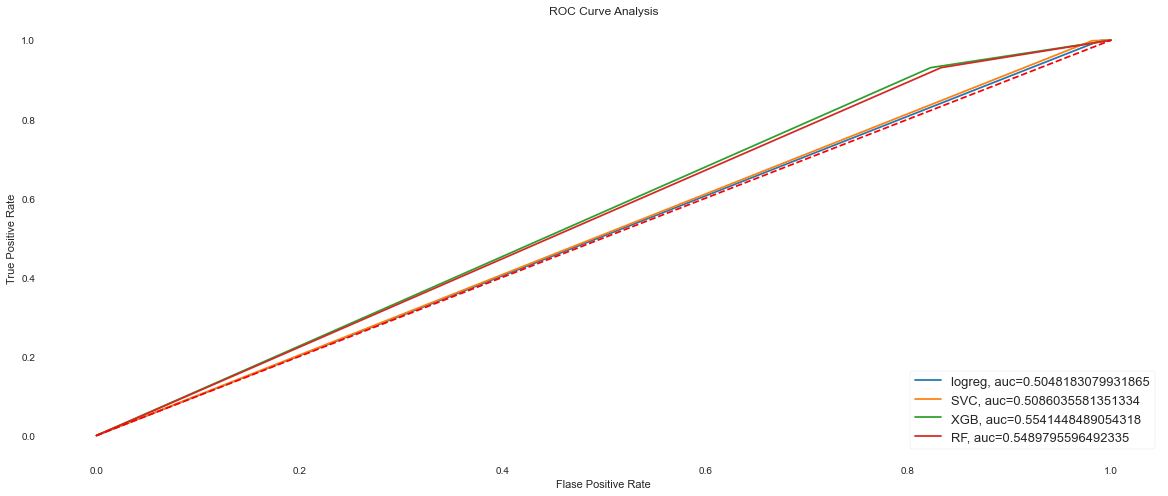

In [32]:
#roc curve
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.plot(fpr_log,tpr_log,label="logreg, auc="+str(auc_log))
plt.plot(fpr_svm,tpr_svm,label="SVC, auc="+str(auc_svm))
plt.plot(fpr_xgb,tpr_xgb,label="XGB, auc="+str(auc_xgb))
plt.plot(fpr_rf,tpr_rf,label="RF, auc="+str(auc_rf))
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel("Flase Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC Curve Analysis')
plt.legend(prop={'size':13}, loc='lower right')

In [33]:
from sklearn.metrics import fbeta_score

def fbeta_scaled(x_trn, y_trn, x_tst, y_tst):
    logistic_reg = LogisticRegression()
    svm_model = svm.SVC()
    xgb = XGBClassifier()
    random_forest = RandomForestClassifier()
    
    l = logistic_reg.fit(x_trn,y_trn)
    s = svm_model.fit(x_trn,y_trn)
    x = xgb.fit(x_trn,y_trn)
    r = random_forest.fit(x_trn,y_trn)
    
    l_pred = l.predict(x_tst)
    s_pred = s.predict(x_tst)
    x_pred = x.predict(x_tst)
    r_pred = r.predict(x_tst)
    
    l_fbeta = fbeta_score(y_tst,l_pred,3)
    s_fbeta = fbeta_score(y_tst,s_pred,3)
    x_fbeta = fbeta_score(y_tst,x_pred,3)
    r_fbeta = fbeta_score(y_tst,r_pred,3)
    
    fbeta_scaled= {'model':['LogisticReg','SVM','XGb','RandomForest'], 
              'fb_scr':[l_fbeta,s_fbeta,x_fbeta,r_fbeta]}
    fbeta_scaled = pd.DataFrame(data= fbeta_scaled)
    
    return fbeta_scaled

In [34]:
fbeta_scaled(X_train_scaledData,y_train,X_test_scaledData,y_test)

,model,fb_scr
0,LogisticReg,0.967222
1,SVM,0.966875
2,XGb,0.911749
3,RandomForest,0.916559


In [35]:
model_xgb = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=10, 
                      gamma=10)

x = model_xgb.fit(X_train_scaledData,y_train)
x_pred = x.predict(X_test_scaledData)

test_acc = accuracy_score(y_test,x_pred)
train_acc = accuracy_score(y_train, model_xgb.predict(X_train_scaledData))
           
print('The accuracy of Test Data: {} and Train data: {}'.format(test_acc, train_acc))

[11:56:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


The accuracy of Test Data: 0.7511688311688312 and Train data: 0.7503247596778384


In [36]:
roc_auc_x = metrics.roc_auc_score(y_test.statusCode,x_pred)
roc_auc_x

0.5058513658444262

In [46]:
model_xgb_pred=model_xgb.predict_proba(X_train)
model_xgb_pred

array([[0.04981971, 0.9501803 ],
       [0.05423033, 0.94576967],
       [0.04981971, 0.9501803 ],
       ...,
       [0.05443025, 0.94556975],
       [0.07544816, 0.92455184],
       [0.0740214 , 0.9259786 ]], dtype=float32)

In [192]:
logistic_reg = LogisticRegression()

logistic_model = logistic_reg.fit(X_train_scaledData, y_train)
logistic_pred = logistic_model.predict(X_test_scaledData)
logistic_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [200]:
roc_logReg_auc_x = metrics.roc_auc_score(y_test.statusCode,logistic_pred)
roc_logReg_auc_x

0.5048183079931865

In [201]:
confusion_matrix(y_test, logistic_pred, labels=None, sample_weight=None, normalize=None)

array([[   5,  479],
       [   1, 1440]], dtype=int64)

In [202]:
output= logistic_model.predict_proba(X_test_scaledData)
output

array([[0.29246004, 0.70753996],
       [0.23319392, 0.76680608],
       [0.34820933, 0.65179067],
       ...,
       [0.35636224, 0.64363776],
       [0.25146808, 0.74853192],
       [0.27610618, 0.72389382]])

In [203]:
cross_val_score(logistic_model, X_test_scaledData, y_test, cv=20)

array([0.74226804, 0.72164948, 0.7628866 , 0.74226804, 0.74226804,
       0.75      , 0.75      , 0.78125   , 0.76041667, 0.76041667,
       0.77083333, 0.76041667, 0.76041667, 0.75      , 0.73958333,
       0.76041667, 0.73958333, 0.75      , 0.73958333, 0.75      ])

In [204]:
test_acc = accuracy_score(y_test,logistic_pred)
train_acc = accuracy_score(y_train, l.predict(X_train_scaledData))
           
print('The accuracy of Test Data: {} and Train data: {}'.format(test_acc, train_acc))

The accuracy of Test Data: 0.7506493506493507 and Train data: 0.7494154325798909


In [205]:
#  Get the coefficient score
logRegCoef = pd.DataFrame(sorted(list(zip(X.columns, logistic_reg.coef_[0])),
                                   key=(lambda x: x[1]),
                                   reverse=True),
                            columns=['Feature', 'Coefficient'])
logRegCoef

,Feature,Coefficient
0,funding_rounds,0.496583
1,No_Of_Investors,0.425744
2,average_raised_usd,0.375541
3,average_time_delay_rounds_number,0.217925
4,MainCatCode,0.077542
5,homepage_url_code,0.054567
6,time_delayFor_first_round_number,-0.065406
7,USA_Region,-0.075758
8,total_funding,-0.232906


In [206]:
# Calculate the intercept value
logistic_reg.intercept_[0]

1.2165093411514627

In [38]:
logreg_App = LogisticRegression()

logreg_App = logreg_App.fit(X_train, y_train)

In [39]:
import pickle
with open("logreg_App.pkl", "wb") as f:
    pickle.dump(logreg_App, f)

In [43]:
train_pred= logreg_App.predict_proba(X_train)
train_pred

array([[0.30586727, 0.69413273],
       [0.48663371, 0.51336629],
       [0.41422305, 0.58577695],
       ...,
       [0.11780819, 0.88219181],
       [0.49507649, 0.50492351],
       [0.45298156, 0.54701844]])

In [105]:
from sklearn import tree

In [48]:
treeModel= tree.DecisionTreeClassifier()

In [66]:
treeModel.fit(X_train_scaledData, y_train)

DecisionTreeClassifier()

In [67]:
y_predTree=treeModel.predict(X_test_scaledData)
y_predTree

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [69]:
confusion_matrix(y_test, y_predTree, labels=None, sample_weight=None, normalize=None)

array([[ 171,  313],
       [ 327, 1114]], dtype=int64)

In [70]:
treeModel.predict_proba(X_test_scaledData)

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
cross_val_score(treeModel, X_test_scaledData, y_test, cv=10)

array([0.72020725, 0.67875648, 0.6373057 , 0.67875648, 0.68393782,
       0.65104167, 0.66666667, 0.625     , 0.671875  , 0.65625   ])

In [59]:
import pickle
with open("decisionTree.pkl", "wb") as f:
    pickle.dump(treeModel, f)

In [74]:
random_forestApp = RandomForestClassifier()

In [75]:
random_forestApp.fit(X_train_scaledData, y_train)

RandomForestClassifier()

In [79]:
RFX_Predict=random_forestApp.predict_proba(X_test_scaledData)
RFX_Predict

array([[0.29, 0.71],
       [0.15, 0.85],
       [0.26, 0.74],
       ...,
       [0.54, 0.46],
       [0.35, 0.65],
       [0.24, 0.76]])

In [53]:
import pickle
with open("scaler_transform.pkl", "wb") as f:
    pickle.dump(scaler_transform, f)

In [162]:
import pickle
with open("logistic_reg.pkl", "wb") as f:
    pickle.dump(logistic_reg, f)